# NATMI

**Language:** Python

**Paper:** Hou, R., et al., Predicting cell-to-cell communication networks using NATMI. Nat Commun, 2020. 11(1): p. 5011.

**Code Resource:** https://github.com/forrest-lab/NATMI

**Claiming:** Inference of intercellular signaling networks (ligand-receptor) in one sample or changes between different samples

**Method:** Weights of edges from a ligand-producing cell type/cluster to a receptor-expressing cell-type/cluster are counted, and then a martix of cell-connectivity-summary-network edges is generated

**Database:** connectomeDB2020 (a database of 2293 manually curated ligand-receptor pairs with literature support)


## Input
1. scRNA-seq data: gene-expression matrix (normalized) with rows as genes and columns as cells
2. cell type annotation
3. custom ligand-receptor pairs lists (optional)

Here, we will use mouse single-cell RNA-seq dataset ('toy.sc.em.txt') and the corresponding annotation file ('toy.sc.ann.txt') from https://github.com/forrest-lab/NATMI

Download link: https://zenodo.org/record/5044902#.YNwfZjoRVGM

## Installation
To simplify the deployment of NATMI, it is recommanded to use the Docker image to run the analysis.

Once docker is installed, the next step is to pull the NATMI image from docker hub using the following command:

`docker pull asrhou/natmi`

### Example Workflow Simple (single-cell toy dataset)
This workflow shows how to extract and visualize intercellular communication using mouse single-cell RNA-seq dataset ('toy.sc.em.txt') and the corresponding annotation file ('toy.sc.ann.txt') and literature supported ligand-receptor pairs from connectomeDB2020.

Additional information of all the parameters can be founded at https://github.com/forrest-lab/NATMI

In [1]:
# example matrix
head(read.table("toy.sc.em.txt"))

,AAAGATGAGCCGATTT.1,AACACGTTCTTGAGGT.1,ACACTGAGTGTCCTCT.1,ACATACGCAGACGCAA.1,ACCAGTAGTGGTTTCA.1,ACCCACTAGGCAAAGA.1,AGTCTTTCAGTGGAGT.1,AAACCTGTCGCGTTTC.1,AAAGCAAAGTACGTAA.1,AAAGTAGAGGCGCTCT.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sox17,0.0000000,0.0000000,0.00000,0.0000000,0.0000000,1.833138,0,0,0.000000,0.000000
Mrpl15,0.0000000,0.8724465,0.00000,0.0000000,0.3677658,0.000000,0,0,1.865399,0.000000
Lypla1,0.5882137,0.0000000,0.00000,0.6010290,0.0000000,0.000000,0,0,0.000000,0.000000
Gm37988,0.0000000,0.0000000,0.00000,0.0000000,0.0000000,0.000000,0,0,0.000000,0.000000
Tcea1,0.9561026,0.0000000,1.35311,0.9738007,0.0000000,0.000000,0,0,0.000000,1.872352
Rgs20,0.0000000,0.0000000,0.00000,0.0000000,0.0000000,0.000000,0,0,0.000000,0.000000


In [4]:
# example annotation
head(read.table("toy.sc.ann.txt", sep ="\t", header = TRUE))

,barcode,annotation
,<chr>,<chr>
1,AAAGATGAGCCGATTT-1,Cancer Cell
2,AACACGTTCTTGAGGT-1,Cancer Cell
3,ACACTGAGTGTCCTCT-1,Cancer Cell
4,ACATACGCAGACGCAA-1,Cancer Cell
5,ACCAGTAGTGGTTTCA-1,Cancer Cell
6,ACCCACTAGGCAAAGA-1,Endothelial Cells


### Extract ligand-receptor-mediated interactions in 'toy.sc.em.txt' and save results to 'example' folder using ExtractEdges.py

Here, we use ExtractEdges.py to extract interactions in the toy single-cell dataset (with three cell types) based on literature supported ligand-receptor pairs from the connectomeDB2020.

`docker run --rm -it --name natmi -v /home/path/workdir/:/opt/NATMI/workdir asrhou/natmi python ExtractEdges.py --species mouse --emFile toy.sc.em.txt --annFile toy.sc.ann.txt --interDB lrc2p --coreNum 4 --out /opt/NATMI/workdir/toy.sc`


All the outputs are saved in *toy.sc* folder, details of the outputs are inferred by *README.txt*.

    README

    ClusterMapping.csv: cell-to-cluster mapping.
    Ligands_Receptors_xx.xlsx: information about ligands and receptors in each cell-type/single-cell cluster.
    Edges_xx.csv: all ligand-receptor-mediated communications.
    LR-pairs_xx folder: all ligand-receptor-mediated communications via a ligand-receptor pair.

### Visualise ligand-receptor-mediated interaction network of in 'toy.sc.em.txt' in three different ways
The output of ExtractEdges.py in the *toy.sc* folder are the predicted edges between the three cell types. Visualisation of these extracted edges is a good place to start interrogating their biological meaning. For a complete view of the cell-to-cell communication network, we first visualise the cell-connectivity-summary network in the *toy.sc* folder.

`docker run --rm -it --name natmi -v /home/path/workdir/:/opt/NATMI/workdir asrhou/natmi python VisInteractions.py --sourceFolder /opt/NATMI/workdir/toy.sc --interDB lrc2p --weightType mean --detectionThreshold 0.2 --plotFormat pdf --drawNetwork y --plotWidth 12 --plotHeight 10 --layout kk --fontSize 8 --edgeWidth 0 --maxClusterSize 0 --clusterDistance 1`

Network in *toy.sc/Network_exp_0_spe_0_det_0.2_top_0_signal_lrc2p_weight_mean/network_total-specificity-based_layout_circle.pdf* is the cell-connectivity-summary network weighted by the sum of specificity weights for ligand-receptor pairs with common sending and receiving cell types.

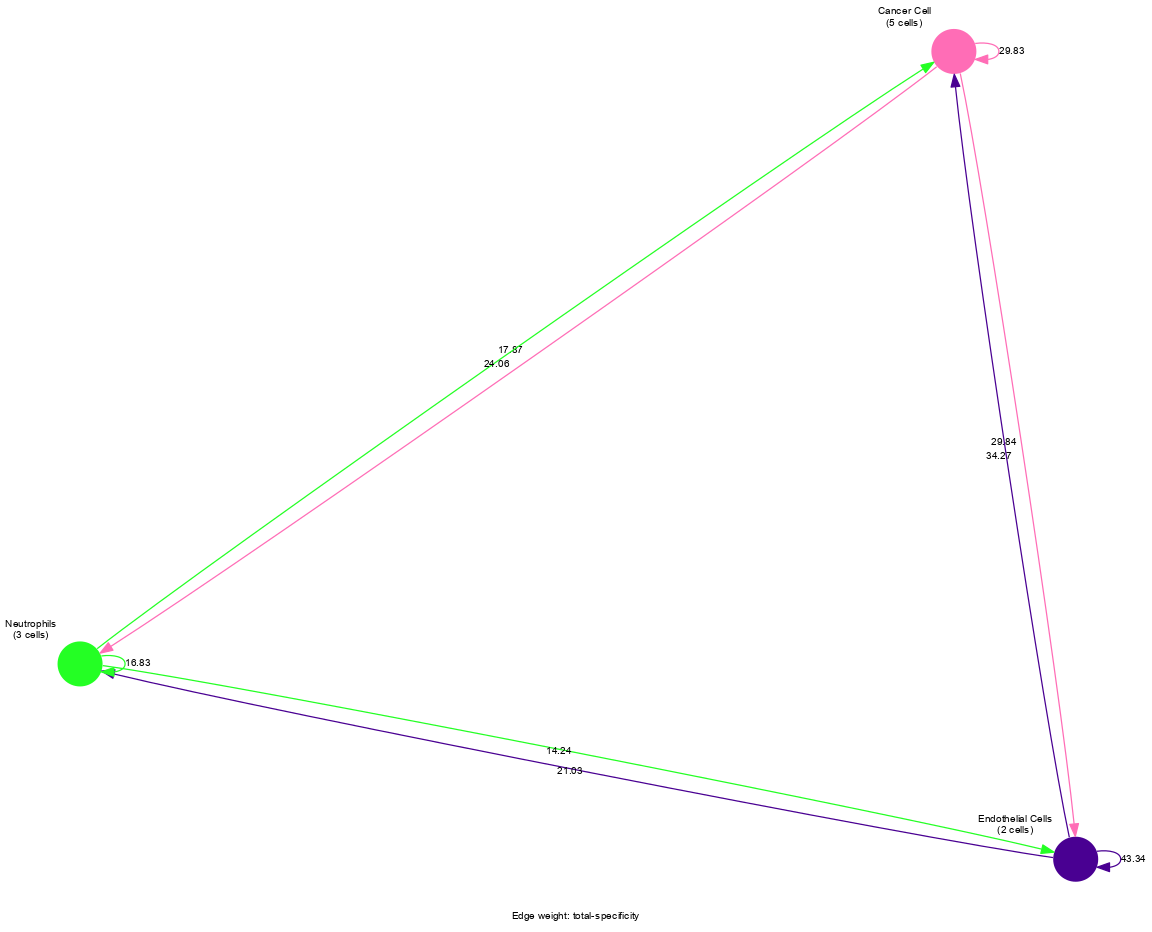

We then visualise top 15 ligand-receptor pairs between the three cell types.

`docker run --rm -it --name natmi -v /home/path/workdir/:/opt/NATMI/workdir asrhou/natmi python VisInteractions.py --sourceFolder /opt/NATMI/workdir/toy.sc --drawClusterPair y --keepTopEdge 15`

Bipartite graph in *toy.sc/CltPair_exp_0_spe_0_det_0.2_top_15_signal_lrc2p_weight_mean/From_Endothelial Cells_to_Endothelial Cells_spe.pdf* shows 15 most specific ligand-receptor pairs endothelial cell to itself.

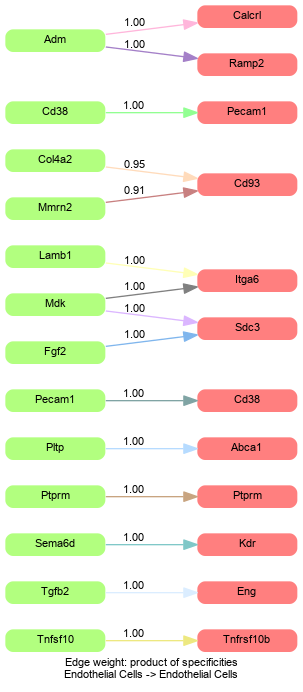

We then visualise the cell-to-cell communication network via Efnb2-Pecam1 pair.

`docker run --rm -it --name natmi -v /home/path/workdir/:/opt/NATMI/workdir asrhou/natmi python VisInteractions.py --sourceFolder /opt/NATMI/workdir/toy.sc --interDB lrc2p --drawLRNetwork Efnb2 Pecam1`

Network in *toy.sc/LRNetwork_Efnb2-Pecam1_exp_0_spe_0_det_0.2_top_0_signal_lrc2p_weight_mean/network_Efnb2-Pecam1_layout_kk.pdf* only has one edge. This means although other cell-type pairs are connected by edges of Efnb2-Pecam1 pair, only for endothelial cell, Efnb2 and Pecam1 are detected in > 20 % cells. Therefore, Efnb2-Pecam1 pair is only reliably detected in endothelial cell.

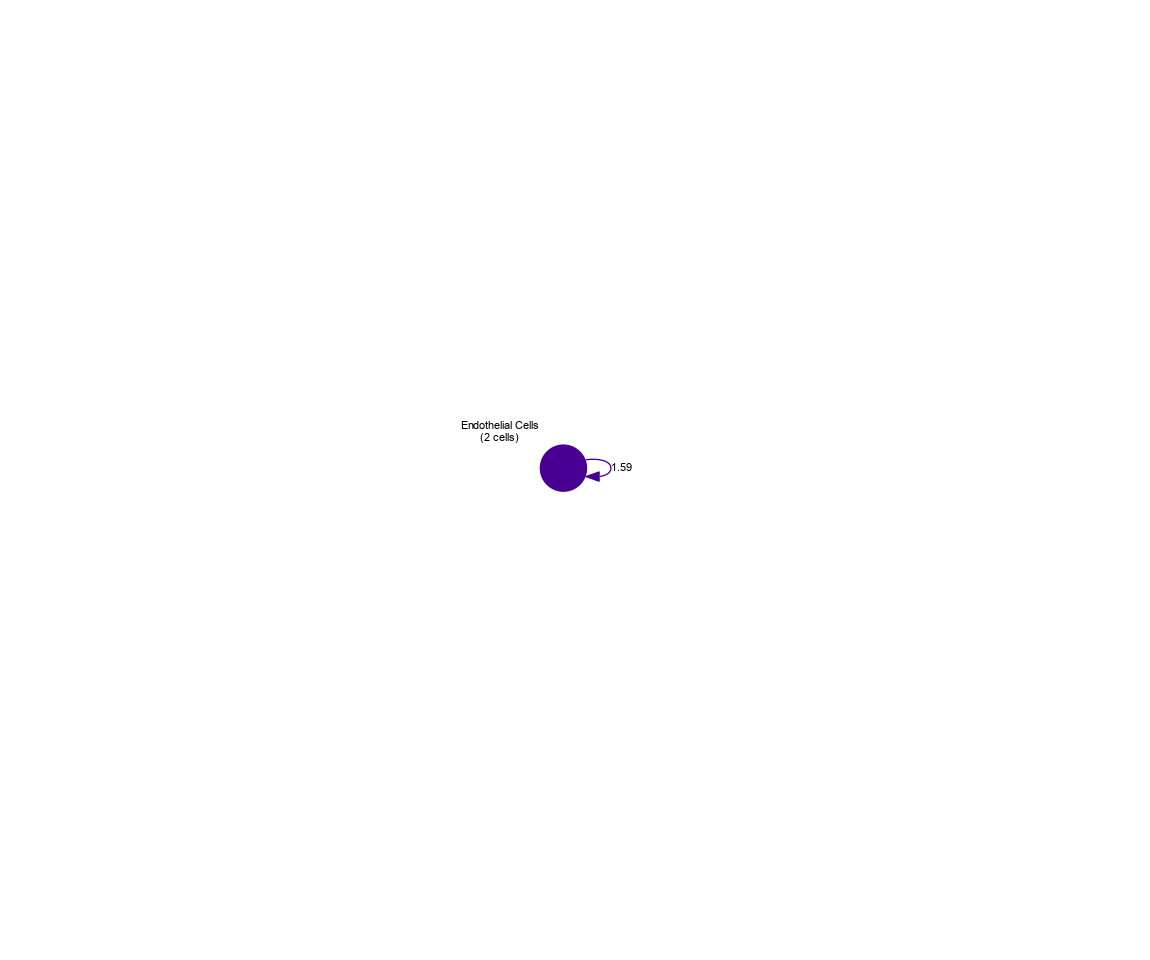

Last updated: June 12,2021